In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

% matplotlib inline

In [56]:
np.random.seed(10)

In [57]:
def plot_decision_boundary(X, model):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x, y = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[x.ravel(), y.ravel()])

    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, cmap=plt.cm.Paired)

In [58]:
# Create dataset
N = 500
D = 2
X = np.random.randn(N,D)

sep = 2
X[:125] += np.array([sep, sep])
X[125:250] += np.array([sep, -sep])
X[250:375] += np.array([-sep, -sep])
X[375:] += np.array([-sep, sep])
Y = np.array([0]*125 + [1]*125 + [0]*125 + [1]*125)

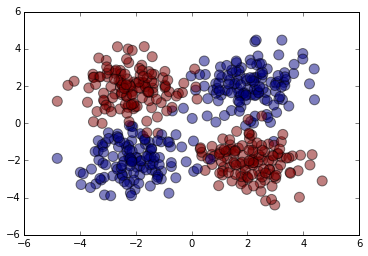

In [59]:
plt.scatter(X[:, 0], X[:, 1], s=100,c=Y, alpha=0.5)
plt.show()

Score for 1 tree: 1.0


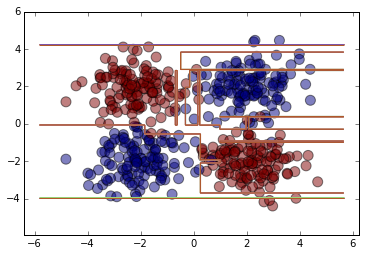

In [60]:
model = DecisionTreeClassifier()
model.fit(X, Y)
print "Score for 1 tree: {}".format(model.score(X, Y))

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()

In [61]:
class BaggedtreeClassifier:
    def __init__(self, B):
        self.B = B
        
    def fit(self, X, Y):
        N = len(X)
        self.models = []
        for b in range(self.B):
            idx = np.random.choice(N, size=N, replace=True)
            Xb = X[idx]
            Yb = Y[idx]
            
            model = DecisionTreeClassifier(max_depth=2)
            model.fit(Xb, Yb)
            self.models.append(model)
            
    
    def predict(self, X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return np.round(predictions / self.B)
    
    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(Y == P)

Score for bagged model: 0.968


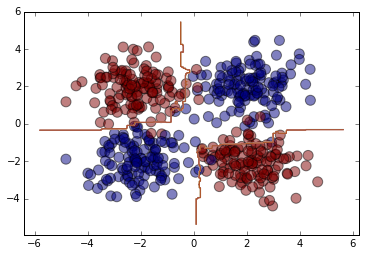

In [62]:
model = BaggedtreeClassifier(200)
model.fit(X, Y)

print "Score for bagged model: {}".format(model.score(X, Y))


plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()